# Haaland Performance Analysis

A comprehensive analysis and visualization of Erling Haaland's 2022-23 Premier League season. This project uses Python and data visualization libraries like mplsoccer and matplotlib to create interactive shot maps, goal distributions, and detailed performance statistics, providing insights into Haaland's scoring patterns and efficiency.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from mplsoccer import VerticalPitch
import matplotlib.image as mpimg
import matplotlib.font_manager as font_manager

In [4]:
df = pd.read_csv('dataset/erling_haaland_2022_understat.csv')

In [5]:
df.head(3)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball


In [6]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [7]:
df.isna().sum()

id                  0
minute              0
result              0
X                   0
Y                   0
xG                  0
player              0
h_a                 0
player_id           0
situation           0
season              0
shotType            0
match_id            0
h_team              0
a_team              0
h_goals             0
a_goals             0
date                0
player_assisted    21
lastAction          0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
numerical = ['minute','xG','h_goals','a_goals']

# Calculate the descriptive statistics
descriptive_stats = df[numerical].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the results
print(descriptive_stats)

           minute        xG   h_goals   a_goals
mean    44.886179  0.266353  2.219512  1.504065
median  42.000000  0.135466  2.000000  1.000000
std     24.896903  0.230057  1.748707  1.176087
min      0.000000  0.020325  0.000000  0.000000
max     95.000000  0.761169  6.000000  4.000000


In [10]:
# Calculate the stats we'll need to display

# 1. Total shots
total_shots = df.shape[0]

# 2. Total goals
total_goals = df[df['result'] == 'Goal'].shape[0]

# 3. Total xG
total_xG = df['xG'].sum()

# 4. xG per shot
xG_per_shot = total_xG / total_shots

# 5. Average distance of shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()
actual_average_distance_meters = actual_average_distance * 0.9144

In [11]:
print('Total Shots = ',total_shots)
print('Total Goals = ',total_goals)
print('Total Expected Goals = ',total_xG)
print('Expected Goals per Shot = ',xG_per_shot)
print('Points Average Distance = ',points_average_distance)
print('Actual Average Distance Meters = ',actual_average_distance_meters)

Total Shots =  123
Total Goals =  36
Total Expected Goals =  32.76137728616595
Expected Goals per Shot =  0.2663526608631378
Points Average Distance =  90.2333329983843
Actual Average Distance Meters =  10.716768367532868


In [12]:
# Calculate shots by type
left_foot_shots = len(df[df['shotType'] == 'LeftFoot'])
right_foot_shots = len(df[df['shotType'] == 'RightFoot'])
header_shots = len(df[df['shotType'] == 'Head'])

In [13]:
print('Left Foot Shots = ',left_foot_shots)
print('Right Foot Shots = ',right_foot_shots)
print('Head Shots = ',header_shots)

Left Foot Shots =  75
Right Foot Shots =  19
Head Shots =  28


# Number of Assists by Player

In [14]:
assist = df['player_assisted'].value_counts()

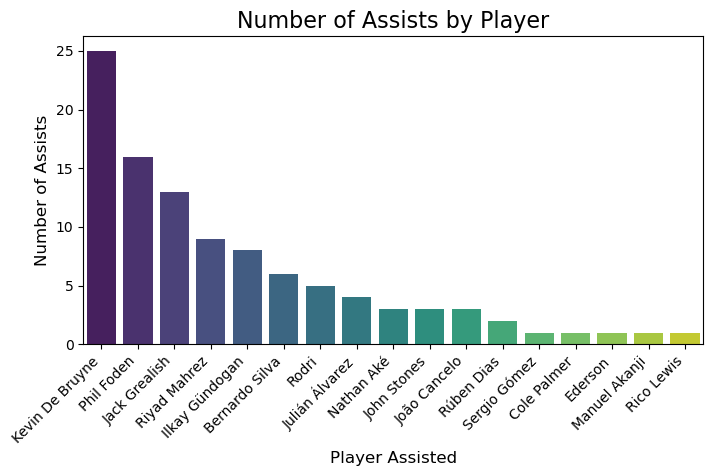

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(x=assist.index, y=assist.values, palette='viridis')
plt.title('Number of Assists by Player', fontsize=16)
plt.xlabel('Player Assisted', fontsize=12)
plt.ylabel('Number of Assists', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.show()

# Expected Goals Distribution

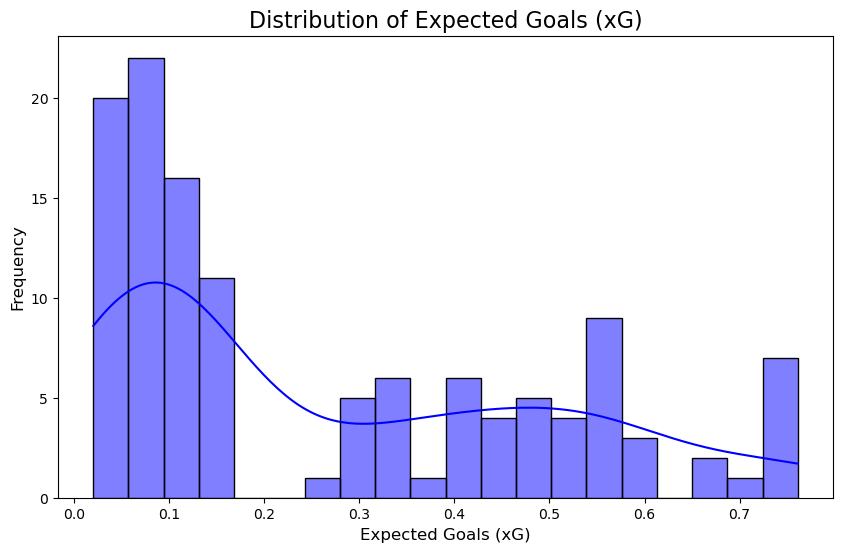

In [16]:
# Plot the distribution of xG
plt.figure(figsize=(10, 6))

# Use seaborn to plot the xG distribution
sns.histplot(df['xG'], bins=20, kde=True, color='blue')

# Add titles and labels
plt.title('Distribution of Expected Goals (xG)', fontsize=16)
plt.xlabel('Expected Goals (xG)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

# Actual Goals vs Expected Goals

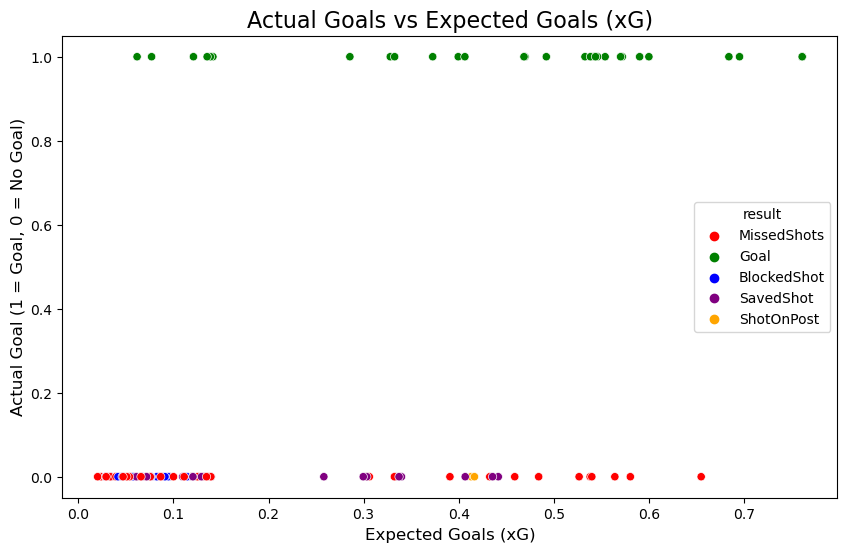

In [17]:
# Create a new column for binary actual goal (1 for Goal, 0 for other results)
df['actual_goal'] = df['result'].apply(lambda x: 1 if x == 'Goal' else 0)

# Scatter plot: Actual Goals vs xG
plt.figure(figsize=(10, 6))

# Plot actual goals (1 for goal) vs xG
sns.scatterplot(data=df, x='xG', y='actual_goal', hue='result', palette={'Goal': 'green', 'MissedShots': 'red', 'SavedShot': 'purple', 'ShotOnPost': 'orange', 'BlockedShot': 'blue'})

# Add titles and labels
plt.title('Actual Goals vs Expected Goals (xG)', fontsize=16)
plt.xlabel('Expected Goals (xG)', fontsize=12)
plt.ylabel('Actual Goal (1 = Goal, 0 = No Goal)', fontsize=12)

# Show the plot
plt.show()

# Cumulative Expected Goals

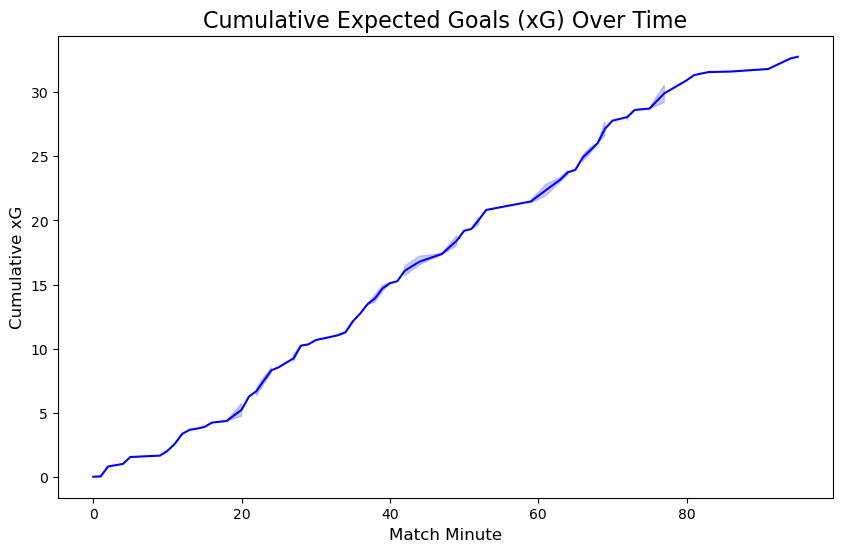

In [18]:
# Sort the DataFrame by match minute (assuming 'minute' column exists)
df = df.sort_values(by='minute')

# Calculate cumulative xG
df['cumulative_xG'] = df['xG'].cumsum()

# Line plot for cumulative xG over time (minute)
plt.figure(figsize=(10, 6))

# Line plot showing cumulative xG
sns.lineplot(x='minute', y='cumulative_xG', data=df, color='blue')

# Add titles and labels
plt.title('Cumulative Expected Goals (xG) Over Time', fontsize=16)
plt.xlabel('Match Minute', fontsize=12)
plt.ylabel('Cumulative xG', fontsize=12)

# Show the plot
plt.show()

# Shot Type Distribution

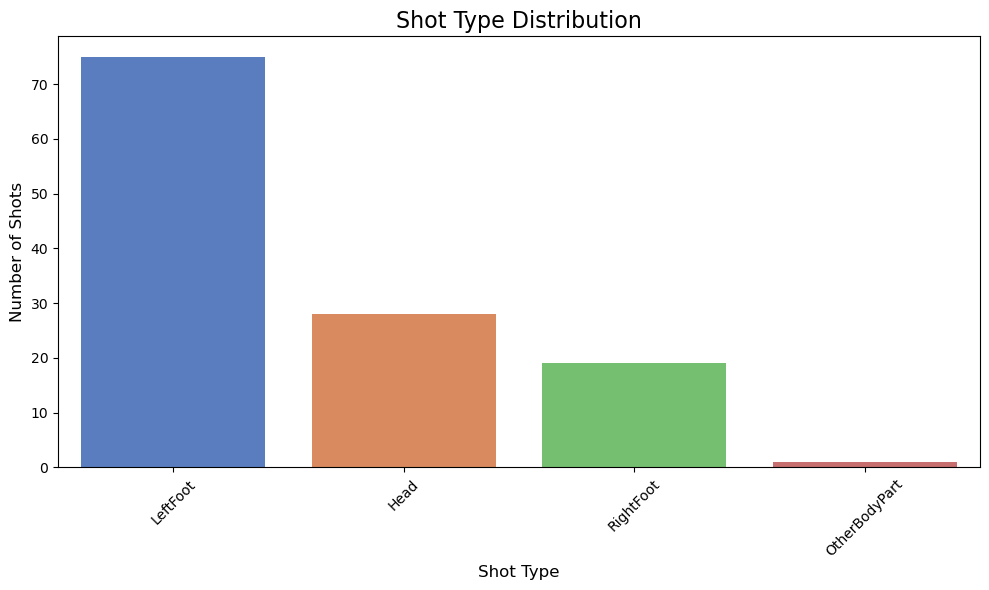

In [19]:
# Count the frequency of each shot type
shot_type_count = df['shotType'].value_counts()

# Plot the shot types
plt.figure(figsize=(10, 6))
sns.barplot(x=shot_type_count.index, y=shot_type_count.values, palette='muted')

# Add titles and labels
plt.title('Shot Type Distribution', fontsize=16)
plt.xlabel('Shot Type', fontsize=12)
plt.ylabel('Number of Shots', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Home vs Away Goals

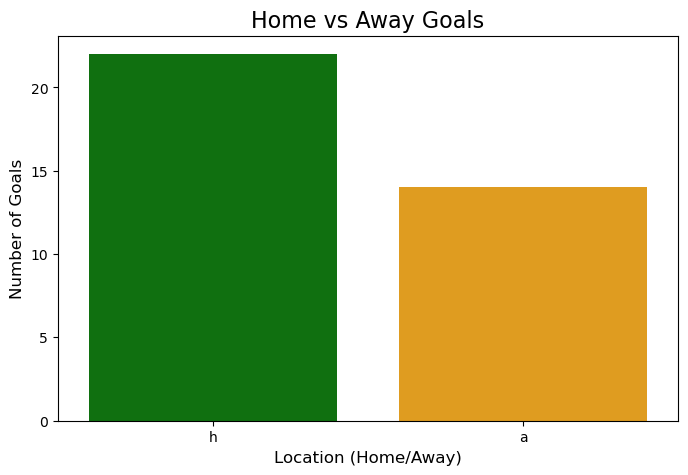

In [20]:
# Filter for goals only
goals_df = df[df['result'] == 'Goal']

# Count the number of goals for Home ('h') vs Away ('a')
home_vs_away_goals = goals_df['h_a'].value_counts()

# Plot Home vs Away Goals
plt.figure(figsize=(8, 5))
sns.barplot(x=home_vs_away_goals.index, y=home_vs_away_goals.values, palette=['green', 'orange'])

# Add titles and labels
plt.title('Home vs Away Goals', fontsize=16)
plt.xlabel('Location (Home/Away)', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)

# Show the plot
plt.show()


# Goals per Minute Scored

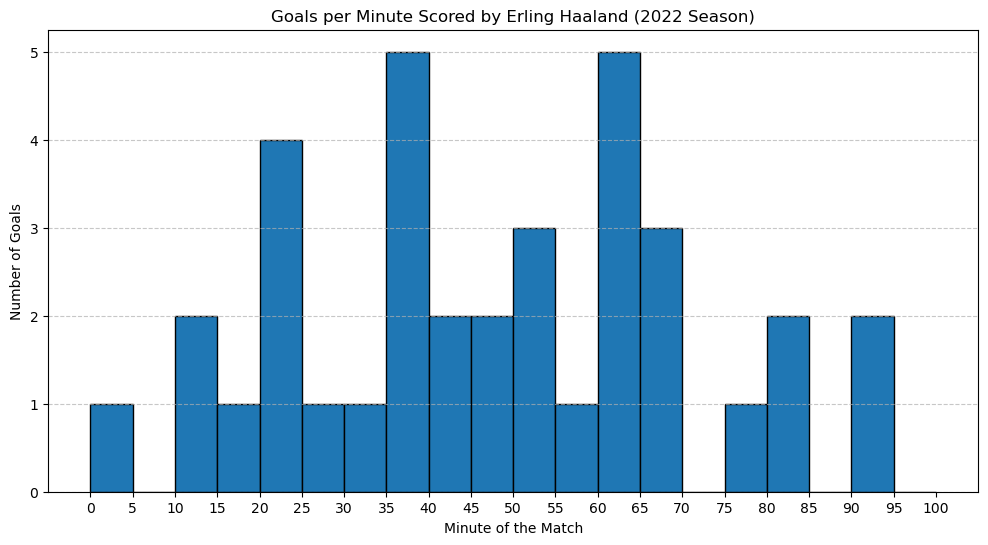

In [21]:
# Plot a histogram of goals per minute
plt.figure(figsize=(12, 6))
plt.hist(goals_df['minute'], bins=range(0, 101, 5), edgecolor='black')
plt.title('Goals per Minute Scored by Erling Haaland (2022 Season)')
plt.xlabel('Minute of the Match')
plt.ylabel('Number of Goals')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Teams That Received the Most Goals

In [22]:
goals_df['opponent_team'] = goals_df.apply(lambda row: row['h_team'] if row['h_a'] == 'a' else row['a_team'], axis=1)

#team_goal_counts = goals_df['opponent_team'].value_counts()
team_goal_counts = goals_df['opponent_team'].value_counts().sort_values(ascending=False)


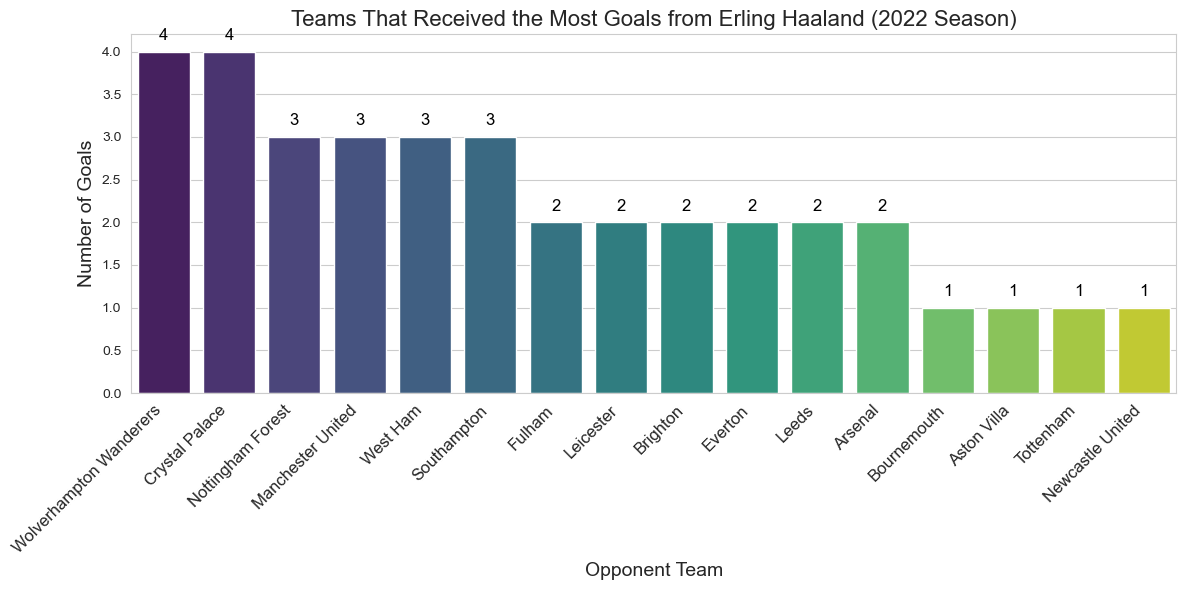

In [23]:
# Plot a bar chart of teams and the number of goals received
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=team_goal_counts.index, y=team_goal_counts.values, palette='viridis')
plt.title('Teams That Received the Most Goals from Erling Haaland (2022 Season)', fontsize=16)
plt.xlabel('Opponent Team', fontsize=14)
plt.ylabel('Number of Goals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Annotate the bars with goal counts
for index, value in enumerate(team_goal_counts.values):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12, color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Shot in the Field

In [24]:
# Color -> They went with a black so we'll do the same. Notice how it isn't a pure black but rather a lighter little bit of grey black
background_color='#0C0D0E'

# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
font_path = 'dataset/Arvo-Regular.ttf'

# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [25]:
# Load Manchester City logo
logo_path = 'dataset/Manchester_City_FC_badge.png'  # Replace with your image path
logo = mpimg.imread(logo_path)

In [26]:
pitch = VerticalPitch(
    pitch_type='opta', 
    half=True, 
    pitch_color='grass', #background_color, 
    pad_bottom=.15, 
    line_color='white',
    linewidth=.45,
    axis=True, label=True
)

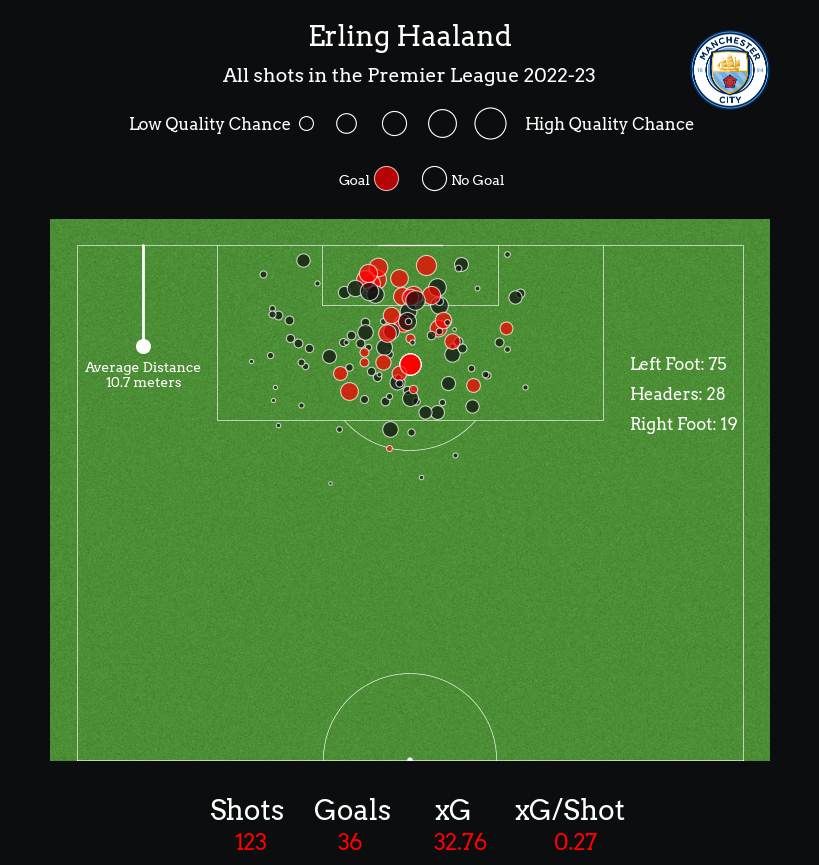

In [27]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# Add Manchester City logo
ax_logo = fig.add_axes([0.85, 0.8, 0.1, 0.1])
ax_logo.imshow(logo)
ax_logo.axis('off')

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(
    x=0.5, 
    y=.85, 
    s='Erling Haaland', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.7, 
    s=f'All shots in the Premier League 2022-23', 
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props, 
    color='white', 
    ha='center'
)
ax1.text(
    x=0.25, 
    y=0.5, 
    s=f'Low Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.75, 
    y=0.5, 
    s=f'High Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)


ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=300, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance_meters:.1f} meters', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='red' if x['result'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )
    
ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25, 
    y=.5, 
    s='Shots', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.28, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=.5, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.41, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=.5, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=.5, 
    s='xG/Shot', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.68, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.set_axis_off()

# Add section for detailed shot breakdown (ax4)
ax4 = fig.add_axes([0.7, 0.25, 0.25, 0.5])
ax4.set_facecolor(background_color)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

ax4.text(
    x=0.30, 
    y=0.7, 
    s=f'Left Foot: {left_foot_shots}', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)
ax4.text(
    x=0.30, 
    y=0.65, 
    s=f'Headers: {header_shots}',     
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)
ax4.text(
    x=0.30, 
    y=0.6,     
    s=f'Right Foot: {right_foot_shots}', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)
ax4.set_axis_off()

In [28]:
# Save the figure
fig.savefig('erling_haaland_2022.png', facecolor=background_color, bbox_inches='tight')